MOCK-UP OF GROUP 2 SUPERVISED ML MODEL: LINEAR REGRESSION
    
    NOTE: Mocking up before we have cleaned data so this is very rough outline and will require additional discussion and/or modification. 

In [2]:
# Import dependencies
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt 
from  sklearn.linear_model import  LinearRegression

In [3]:
# Load tornado data CSV as a Pandas DataFrame and preview the DataFrame
file_path = Path('Raw_Data/1950-2020_torn.csv')
df = pd.read_csv(file_path, index_col=0)
df.head(25)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
surr_key,,,,,,,,,,,,,,,,,,,,,
1,192,1950,10,1,10/1/1950,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
2,193,1950,10,9,10/9/1950,2:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
3,195,1950,11,20,11/20/1950,2:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
4,196,1950,11,20,11/20/1950,4:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
5,197,1950,11,20,11/20/1950,7:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0
6,194,1950,11,4,11/4/1950,17:00:00,3,PA,42,5,...,15.9,100,1,1,1,71,11,0,0,0
7,198,1950,12,2,12/2/1950,15:00:00,3,IL,17,7,...,18.8,50,1,1,1,119,117,0,0,0
8,199,1950,12,2,12/2/1950,16:00:00,3,IL,17,8,...,18.0,200,1,1,1,119,5,0,0,0
9,200,1950,12,2,12/2/1950,16:25:00,3,AR,5,12,...,7.8,10,1,1,1,65,0,0,0,0


In [5]:
# Review columns
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'f',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

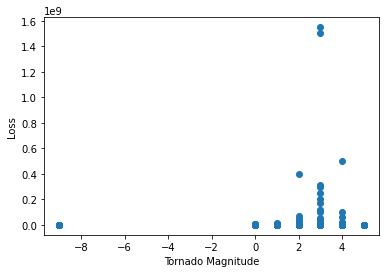

In [7]:
# Visually inspect relationship between tornado magnitude ('f' column) and 'loss'
plt.scatter(df.f, df.loss) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Loss') 
plt.show()

In [9]:
# Format data to meet the requirements of the Scikit-learn library: 
X = df.f.values.reshape(-1, 1)

In [10]:
# Review shape of X - # rows and columns
X.shape

(67504, 1)

In [14]:
# Assign the target variable - loss
y = df.loss

In [15]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [16]:
# Fit/Train the data
model.fit(X, y)

LinearRegression()

In [17]:
# Use predict method to generate predictions of loss based on magnitude
y_pred = model.predict(X)
print(y_pred.shape)

(67504,)


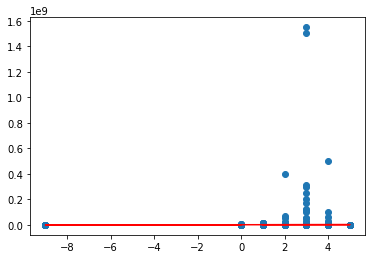

In [18]:
# Plot the predictions of loss aginste the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [19]:
# print(model.coef_)
print(model.intercept_)

-9806.241836024026
